In [34]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns


In [5]:
df = pd.read_csv('dailyActivity_merged.csv')
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [8]:
col= ["Id",'ActivityDate',"TotalSteps",'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes',"SedentaryMinutes","Calories"]
df=df[col]

In [ ]:
df.rename(columns={'ActivityDate':'Date'},inplace=True)
df['Total_minutes'] = df['SedentaryMinutes'] + df['VeryActiveMinutes']+df['FairlyActiveMinutes']+df["LightlyActiveMinutes"]

In [ ]:
df['Total_hours'] = round(df['Total_minutes'] / 60)

In [20]:
print(f"Data dimension: {df.shape}")
for col in df.columns:
    print(f"Column: {col:35} | type: {str(df[col].dtype):7} | missing values: {df[col].isna().sum(): 3d}")

Data dimension: (940, 10)
Column: Id                                  | type: int64   | missing values:   0
Column: Date                                | type: object  | missing values:   0
Column: TotalSteps                          | type: int64   | missing values:   0
Column: VeryActiveMinutes                   | type: int64   | missing values:   0
Column: FairlyActiveMinutes                 | type: int64   | missing values:   0
Column: LightlyActiveMinutes                | type: int64   | missing values:   0
Column: SedentaryMinutes                    | type: int64   | missing values:   0
Column: Calories                            | type: int64   | missing values:   0
Column: Total_minutes                       | type: int64   | missing values:   0
Column: Total_hours                         | type: float64 | missing values:   0


In [ ]:
df.Date=pd.to_datetime(df.Date)

In [25]:
df.head().T

,0,1,2,3,4
Id,1503960366,1503960366,1503960366,1503960366,1503960366
Date,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-14 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00
TotalSteps,13162,10735,10460,9762,12669
VeryActiveMinutes,25,21,30,29,36
FairlyActiveMinutes,13,19,11,34,10
LightlyActiveMinutes,328,217,181,209,221
SedentaryMinutes,728,776,1218,726,773
Calories,1985,1797,1776,1745,1863
Total_minutes,1094,1033,1440,998,1040
Total_hours,18.0,17.0,24.0,17.0,17.0


In [ ]:
import datetime as dt 
df['DayOfWeek'] = df.Date.dt.day_name()

In [27]:
df.head().T

,0,1,2,3,4
Id,1503960366,1503960366,1503960366,1503960366,1503960366
Date,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-14 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00
TotalSteps,13162,10735,10460,9762,12669
VeryActiveMinutes,25,21,30,29,36
FairlyActiveMinutes,13,19,11,34,10
LightlyActiveMinutes,328,217,181,209,221
SedentaryMinutes,728,776,1218,726,773
Calories,1985,1797,1776,1745,1863
Total_minutes,1094,1033,1440,998,1040
Total_hours,18.0,17.0,24.0,17.0,17.0


In [29]:
df.duplicated().sum()

0

In [31]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,940.0,4855407369.332978,1503960366.0,2320127002.0,4445114986.0,6962181067.0,8877689391.0,2424805475.65796
Date,940,2016-04-26 06:53:37.021276672,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
TotalSteps,940.0,7637.910638,0.0,3789.75,7405.5,10727.0,36019.0,5087.150742
VeryActiveMinutes,940.0,21.164894,0.0,0.0,4.0,32.0,210.0,32.844803
FairlyActiveMinutes,940.0,13.564894,0.0,0.0,6.0,19.0,143.0,19.987404
LightlyActiveMinutes,940.0,192.812766,0.0,127.0,199.0,264.0,518.0,109.1747
SedentaryMinutes,940.0,991.210638,0.0,729.75,1057.5,1229.5,1440.0,301.267437
Calories,940.0,2303.609574,0.0,1828.5,2134.0,2793.25,4900.0,718.166862
Total_minutes,940.0,1218.753191,2.0,989.75,1440.0,1440.0,1440.0,265.931767
Total_hours,940.0,20.31383,0.0,16.0,24.0,24.0,24.0,4.437283


Text(0.5, 1.0, 'Frq by day of week')

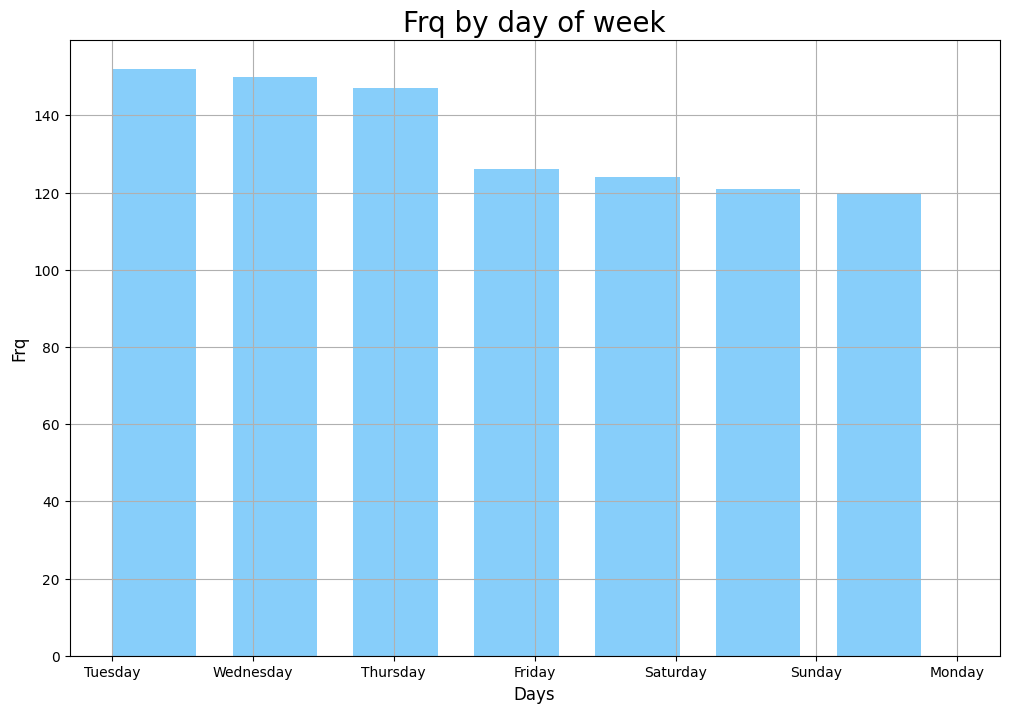

In [45]:
plt.hist(df.DayOfWeek , bins=7 ,color="lightskyblue",width=0.6)
plt.grid()
plt.xlabel('Days',size = 12)
plt.ylabel('Frq',size = 12)
plt.title('Frq by day of week' ,size= 20)


In [60]:
Index=['Id', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Total_minutes',
       'Total_hours']
col = df[Index]

<function matplotlib.pyplot.show(close=None, block=None)>

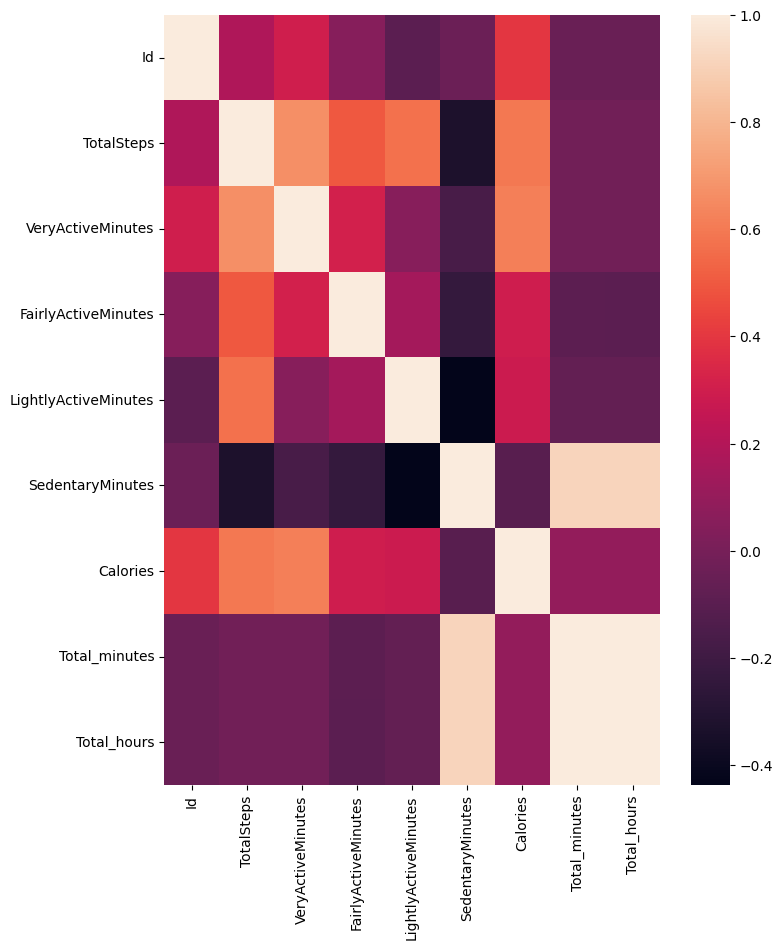

In [74]:
plt.figure(figsize=(8,10))
sns.heatmap(col.corr())
plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


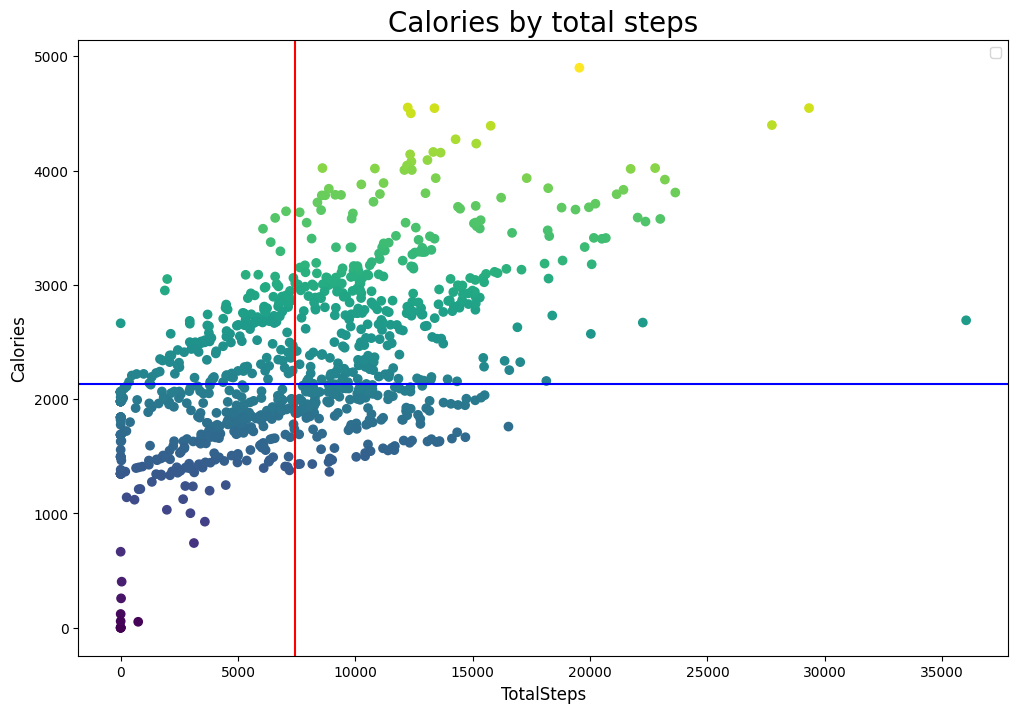

In [85]:
plt.scatter(df['TotalSteps'],df.Calories, c=df.Calories)
med_steps = 7405.5
med_cal=2134.0
plt.axhline(med_cal,color='blue')
plt.axvline(med_steps,color='red')
plt.xlabel('TotalSteps',size = 12)
plt.ylabel('Calories',size = 12)
plt.title('Calories by total steps' ,size= 20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


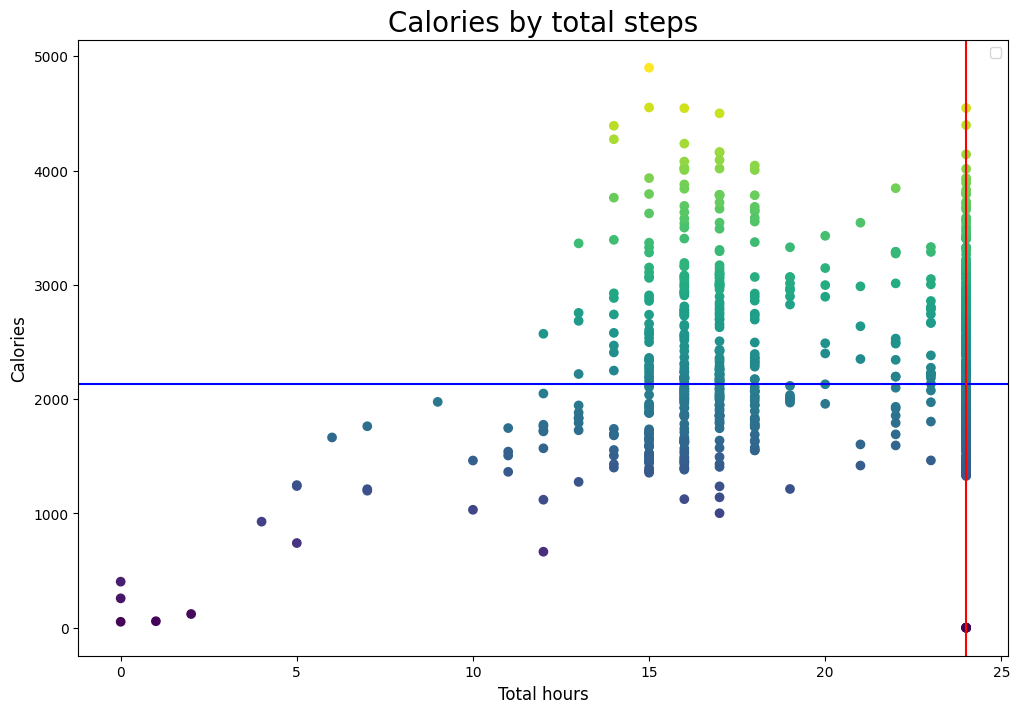

In [84]:
plt.scatter(df['Total_hours'],df.Calories, c=df.Calories)
med_hours = 24.0
med_cal=2134.0
plt.axhline(med_cal,color='blue')
plt.axvline(med_hours,color='red')
plt.xlabel('Total hours',size = 12)
plt.ylabel('Calories',size = 12)
plt.title('Calories by total steps' ,size= 20)
plt.legend()
plt.show()

([<matplotlib.patches.Wedge at 0x1e5f368cd90>,
 [Text(1.0983633515717721, 0.059982896929240755, 'VeryActiveMinutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'FairlyActiveMinutes'),
  Text(0.8658475119228769, 0.6945560352462311, 'LightlyActiveMinutes'),
  Text(-0.9994337278611289, -0.6641778554074256, 'SedentaryMinutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.7%'),
  Text(0.5937830262300761, 0.086149392110756, '1.1%'),
  Text(0.47582611015581516, 0.38169295630648725, '15.8%'),
  Text(-0.5830030079189918, -0.3874370823209982, '81.3%')])

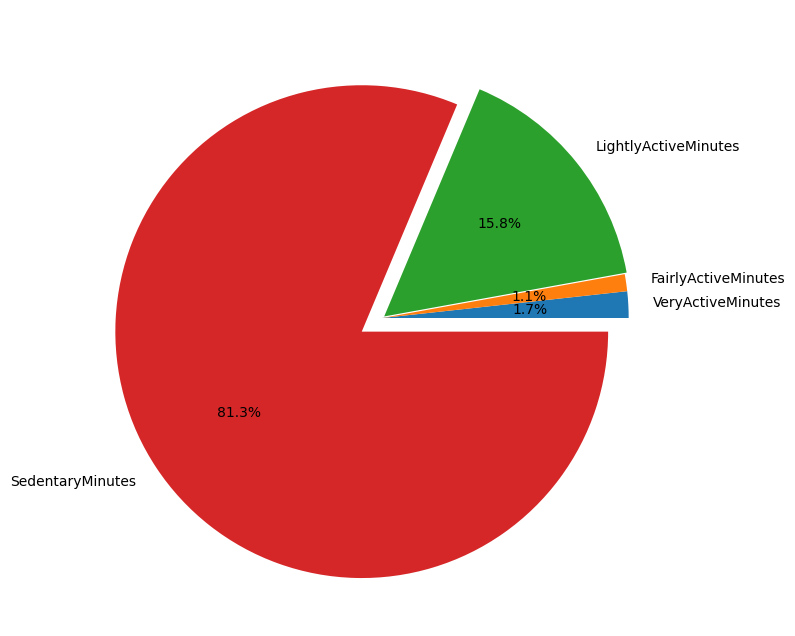

In [95]:
VeryActiveMinutes=df.VeryActiveMinutes.sum()
FairlyActiveMinutes=df.FairlyActiveMinutes.sum()
LightlyActiveMinutes=df.LightlyActiveMinutes.sum()
SedentaryMinutes=df.SedentaryMinutes.sum()

min =[VeryActiveMinutes, FairlyActiveMinutes,LightlyActiveMinutes, SedentaryMinutes]
label =['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes']
plt.pie(min,labels=label,autopct='%1.1f%%',explode=[0,0,0.01,0.1])